<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Deep%20Learning/Previsao_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'green'>Previsão com Keras</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito de regressão utilizando deep learning, com objetivo de realizar uma previsão numa time series(series temporais)

<font size =4> Autor: Kaue Hermann Abbehausen</font>

<font size =4> Linkedin: https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>

Fontes:
1. Curso Deep Learnin: Previsão com Keras; Alura

# Bibliotecas e Dados



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
passageiros =  pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head(10)

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [3]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 14

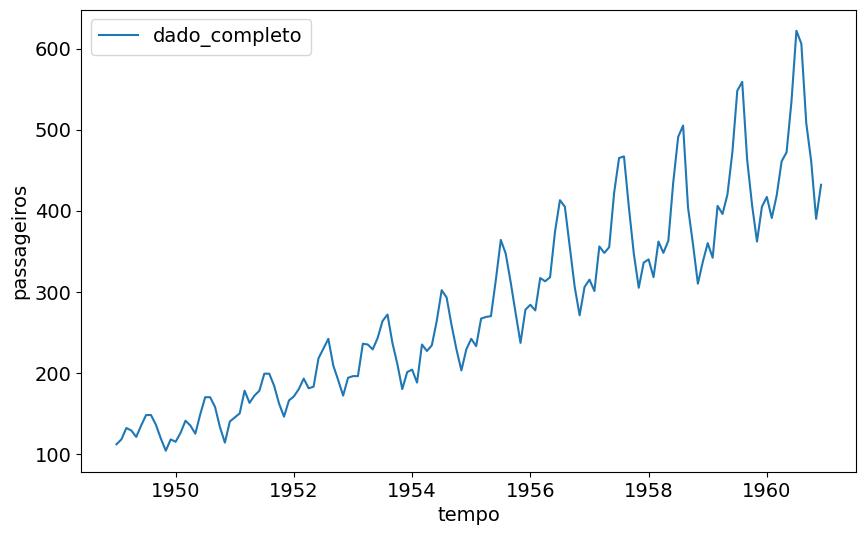

In [4]:
ax = sns.lineplot(x = 'tempo', y= 'passageiros', data = passageiros, label = 'dado_completo')
ax.figure.set_size_inches(10, 6)

# Escalar os dados (normalizar)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc =  StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
dado_escalado[:10,:2]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546]])

In [9]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

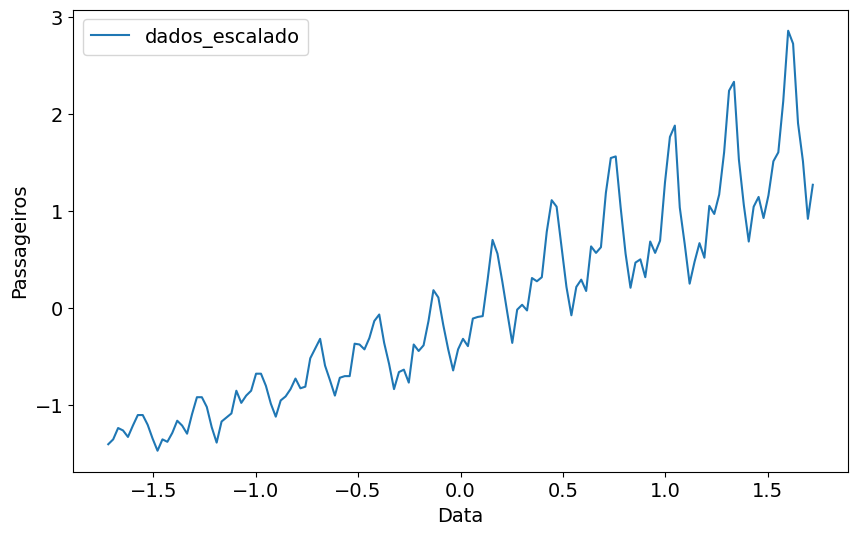

In [10]:
sns.lineplot(x =x, y =y, label = 'dados_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Dividir os dados em treino e teste

Perceba que a separaçaõ em dados de treino e dados de teste não ocorre com o train_test_split.

O motivo disso é porque queremos prever o que irá acontecer no futuro da série temporal, então o teste é verificar a previsão do modelo. O train_teste_split faz a separação dos dados de forma aleatória sem ser para uma série temporal

In [11]:
tamanho_treino =  int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) -  tamanho_treino

In [12]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]


In [13]:
x_teste = x[tamanho_treino:]
y_teste = y[tamanho_treino:]


Text(0.5, 0, 'Data')

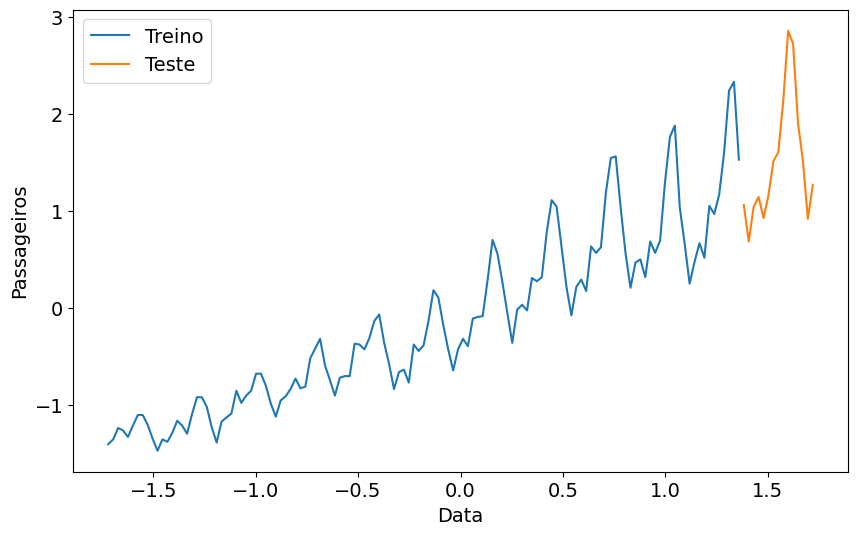

In [14]:
sns.lineplot(x =x_treino, y =y_treino, label = 'Treino')
sns.lineplot(x =x_teste, y =y_teste, label = 'Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# 1º Previsão: Regressão Linear

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
regressor =  Sequential()
regressor.add(
    Dense(1,input_dim = 1, kernel_initializer = 'Ones',activation = 'linear', use_bias = False))


regressor.compile(loss = 'mean_squared_error',
                  optimizer = 'adam')

In [49]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [50]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1286


In [51]:
y_predict = regressor.predict(x_treino)
y_predict.shape

5/5 [==============================] - 0s 3ms/step


(129, 1)

Text(0.5, 0, 'Data')

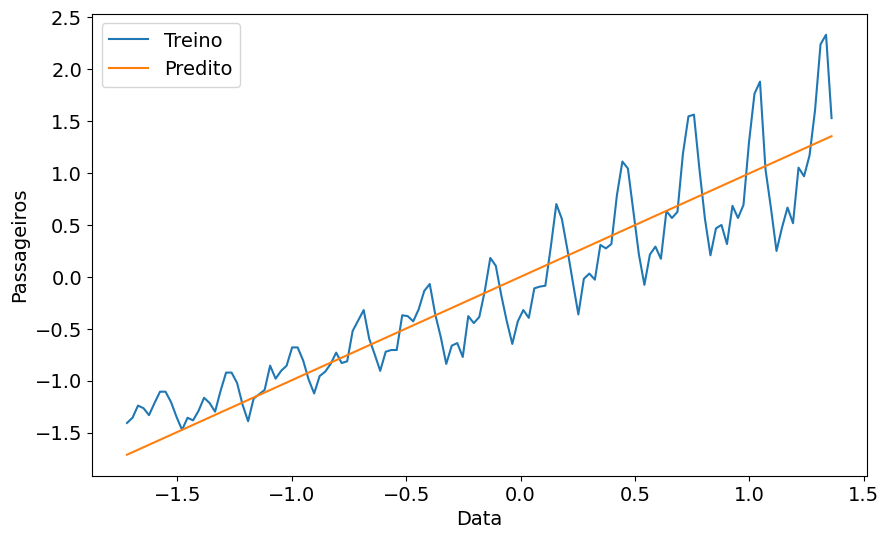

In [52]:
sns.lineplot(x = x_treino, y = y_treino, label = 'Treino')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'Predito')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [55]:
d = {'tempo': x_treino, 'passageiros': y_predict[:, 0]}
resultados = pd.DataFrame(data = d)
resultados = sc.inverse_transform(resultados)
resultados = pd.DataFrame(resultados, columns = ['tempo', 'passageiros'])
resultados

,tempo,passageiros
0,1949.000000,75.442561
1,1949.083333,78.307668
2,1949.166667,81.172803
3,1949.250000,84.037910
4,1949.333333,86.903046
...,...,...
124,1959.333333,430.717387
125,1959.416667,433.582523
126,1959.500000,436.447630
127,1959.583333,439.312751


Text(0.5, 0, 'Data')

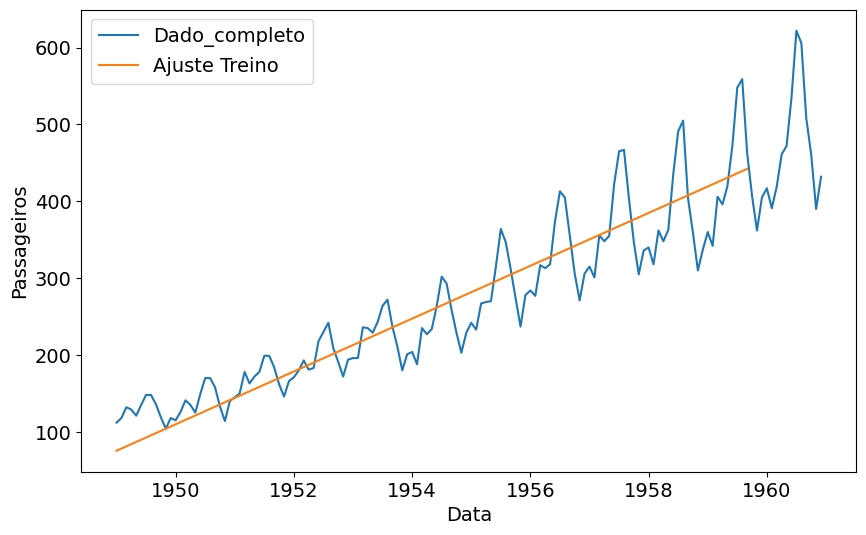

In [56]:
sns.lineplot(x = 'tempo', y = 'passageiros',data = passageiros, label = 'Dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados, label = 'Ajuste Treino')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [57]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 22ms/step


In [63]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data = d)
resultados_teste = sc.inverse_transform(resultados_teste)
resultados_teste = pd.DataFrame(resultados_teste, columns = ['tempo', 'passageiros'])
resultados_teste

,tempo,passageiros
0,1959.750000,445.042993
1,1959.833333,447.908114
2,1959.916667,450.773236
3,1960.000000,453.638342
4,1960.083333,456.503478
5,1960.166667,459.368585
6,1960.250000,462.233720
7,1960.333333,465.098827
8,1960.416667,467.963934
9,1960.500000,470.829069


Text(0.5, 0, 'Data')

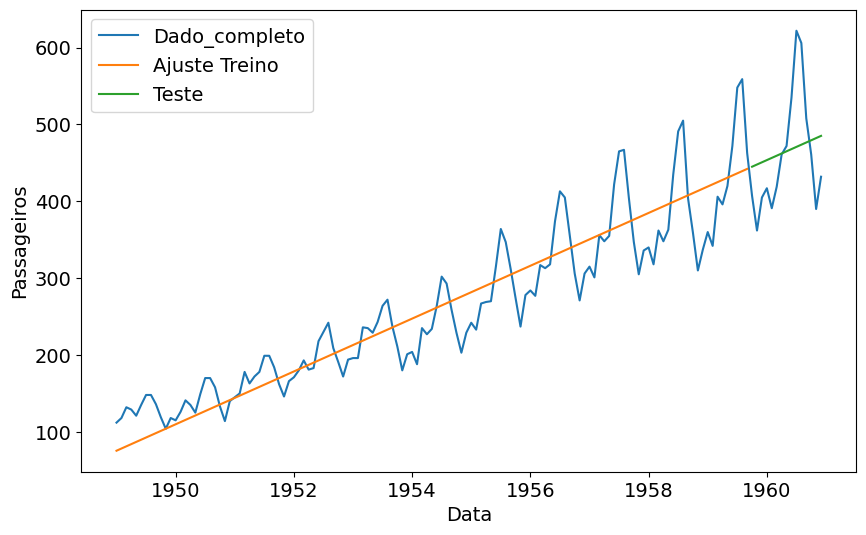

In [65]:
sns.lineplot(x = 'tempo', y = 'passageiros',data = passageiros, label = 'Dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados, label = 'Ajuste Treino')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados_teste, label = 'Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Adicionar Camadas Intermediárias

O objetivo agora é sair da linhas reta e obter uma previsão mais acurada. Para isso temos que alterar a função de ativação ('activation')

Podemos ter combinações de funções entre as camadas.

A alteração da função faz com que as previsões sigam outra curva.


In [79]:
regressor2 = Sequential()

regressor2.add(Dense(8,input_dim = 1, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False)
)

regressor2.add(Dense(8, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False)
)

regressor2.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

In [80]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 8         
                                                                 
 dense_13 (Dense)            (None, 8)                 64        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(x_treino, y_treino, epochs = 200)

In [82]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 34ms/step


Text(0.5, 0, 'Data')

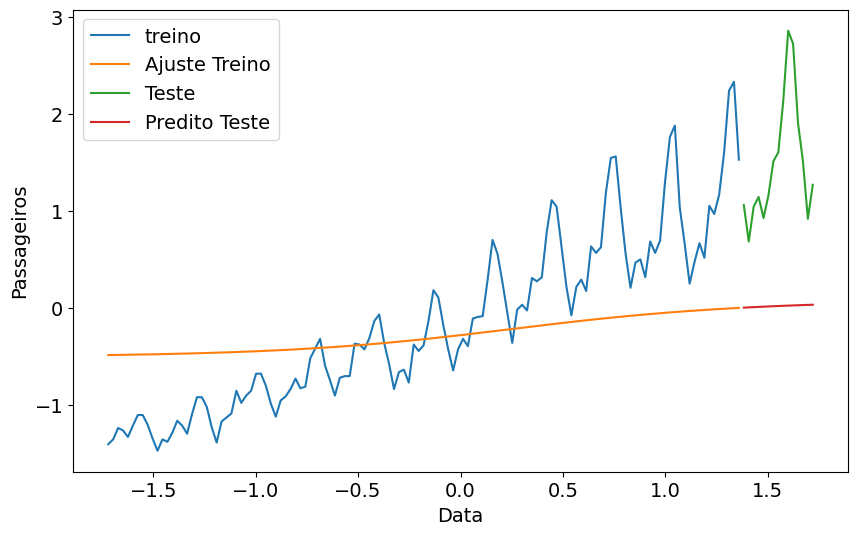

In [83]:
sns.lineplot(x = x_treino,y= y_treino, label='treino')
sns.lineplot(x = x_treino,y= y_predict[:,0], label='Ajuste Treino')
sns.lineplot(x = x_teste,y= y_teste, label='Teste')
sns.lineplot(x = x_teste,y= y_predict_teste[:,0], label='Predito Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')